This notebook was used to produce Figures 8 and 9
>Anton Osokin, Anatole Chessel, Rafael E. Carazo Salas, Federico Vaggi<br>
GANs for Biological Image Synthesis<br>
In ICCV, 2017

In [1]:
import os
import re
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# parameters of the experiment
model_iter_of_interest = [100, 1000, 2000, 3000, 5000, 10000, 30000, 50000, 100000, 300000, 500000]
num_diter = 5000

log_path = 'logs_eval_6class_fake_vs_real'
model_names = ['size-48-80_6class_gan-adam',
               'size-48-80_6class_wgan-rmsprop',
               'size-48-80_6class_wgangp-adam',
               'size-48-80_6class_gan-sep-adam',
               'size-48-80_6class_wgan-sep-rmsprop',
               'size-48-80_6class_wgangp-sep-adam']
model_names_for_legend = ['GAN',
                          'WGAN',
                          'WGAN-GP',
                          'GAN-sep',
                          'WGAN-sep',
                          'WGAN-GP-sep',
                          ]
eval_methods = ['GAN', 'WGAN', 'WGAN-GP']

file_template = 'seed{0}_split{1}_{2}_trainIter{3}_eval{4}_iter{5}.txt'

num_splits = 10
rand_seed = 0

save_prefix='eval_6class_fake_vs_real'

In [3]:
def read_last_line(file_name):
    with open(file_name) as f:
        return(list(f)[-1])
    
def get_score(file_name):
    score = float('nan')
    try:
        last_line = read_last_line(file_name)
        numeric_const_pattern = "[-+]?(?:(?:\d*\.\d+)|(?:\d+\.?))(?:[Ee][+-]?\d+)?"
        score_pattern = 'equals\s*(%s)' % numeric_const_pattern
        match = re.search(score_pattern, last_line)
        if match:
            score = float(match.group(1))
    except:
        print('Could not extract value from {0}'.format(file_name))
    return score

In [4]:
def plot_scores(eval_method, model_names, model_names_for_legend,
               axis=None, save_prefix=None):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    fig = plt.figure(figsize=(3, 2.5))
    ax = fig.add_subplot(111)
    
    method_plots = []
    for i_model, model_name in enumerate(model_names):
        plot_data = np.zeros((num_splits, len(model_iter_of_interest)))
        for i_split in range(num_splits):
            one_run = np.zeros(len(model_iter_of_interest))
            for i_steps, num_train_iters in enumerate(model_iter_of_interest):
                file_name = os.path.join(log_path, file_template)
                file_name = file_name.format(rand_seed, i_split, model_name, num_train_iters,
                                             eval_method, num_diter)
                score = get_score(file_name)
                one_run[i_steps] = score
            plot_data[i_split] = one_run
            
        line_median = np.nanpercentile(plot_data, 50, axis=0)
        line_upper_bound = np.nanpercentile(plot_data, 90, axis=0)
        line_lower_bound = np.nanpercentile(plot_data, 10, axis=0)
        
    
        ax.errorbar(model_iter_of_interest, line_median,
                    yerr=[line_median - line_lower_bound, line_upper_bound - line_median],
                    fmt='-', capsize=4, capthick=1)

        
    ax.legend(model_names_for_legend)
    ax.set_xlabel(r'Training steps')
    ax.set_ylabel(r'%s C2ST score' % eval_method)
        
    ax.set_xscale("log")
    if axis is not None:
        ax.axis(axis)
    if save_prefix is not None:
        fig.savefig(save_prefix + '_' + eval_method + '.pdf', bbox_inches='tight')
    plt.show()

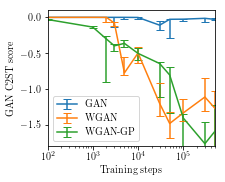

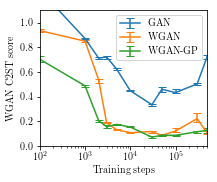

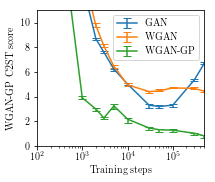

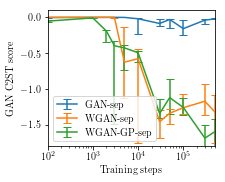

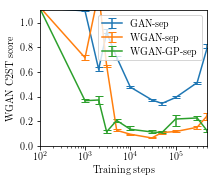

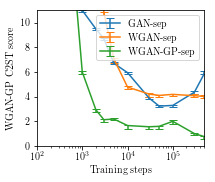

In [5]:
plot_scores('GAN', model_names[:3], model_names_for_legend[:3], axis=(100, 500000, -1.8, 0.1),
           save_prefix=save_prefix + '_regular')

plot_scores('WGAN', model_names[:3], model_names_for_legend[:3], axis=(100, 500000, 0, 1.1),
            save_prefix=save_prefix + '_regular')

plot_scores('WGAN-GP', model_names[:3], model_names_for_legend[:3], axis=(100, 500000, 0, 11),
            save_prefix=save_prefix + '_regular') 

plot_scores('GAN', model_names[3:], model_names_for_legend[3:], axis=(100, 500000, -1.8, 0.1),
            save_prefix=save_prefix + '_separable')

plot_scores('WGAN', model_names[3:], model_names_for_legend[3:], axis=(100, 500000, 0, 1.1),
            save_prefix=save_prefix + '_separable')

plot_scores('WGAN-GP', model_names[3:], model_names_for_legend[3:], axis=(100, 500000, 0, 11),
            save_prefix=save_prefix + '_separable')   

In [6]:
# computing real vs real estimates
log_path_real_vs_real = 'logs_eval_6class-together_real_vs_real'
file_template_real_vs_real = 'seed0_split{0}_eval{1}_iter5000.txt'

for eval_method in eval_methods:
    scores = []
    for i_split in range(num_splits):
        file_name = os.path.join(log_path_real_vs_real,
                                 file_template_real_vs_real.format(i_split, eval_method))
        score = get_score(file_name)
        scores.append(score)
    scores = np.array(scores)
    print('{0}: {1:0.2f}\u00B1{2:0.2f}'.format(eval_method, np.mean(scores), np.std(scores)))

GAN: -3.71±0.72
WGAN: 0.00±0.00
WGAN-GP: -0.73±0.64
